<a href="https://colab.research.google.com/github/ajaycode/machine-learning/blob/main/OpenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://github.com/openai/openai-cookbook/blob/main/apps/web-crawl-q-and-a/web-qa.ipynb

In [ ]:
#!pip install git+https://github.com/openai/openai-cookbook.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/openai-cookbook.git to /tmp/pip-req-build-p2qn7c4b
  Running command git clone --filter=blob:none --quiet https://github.com/openai/openai-cookbook.git /tmp/pip-req-build-p2qn7c4b
  Resolved https://github.com/openai/openai-cookbook.git to commit 0272e206f26038416650291fae70f039fc9cae7e
ERROR: git+https://github.com/openai/openai-cookbook.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [1]:
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os

# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'

# Define root domain to crawl
domain = "openai.com"
full_url = "https://openai.com/"

# Create a class to parse the HTML and get the hyperlinks
class HyperlinkParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # Create a list to store the hyperlinks
        self.hyperlinks = []

    # Override the HTMLParser's handle_starttag method to get the hyperlinks
    def handle_starttag(self, tag, attrs):
        attrs = dict(attrs)

        # If the tag is an anchor tag and it has an href attribute, add the href attribute to the list of hyperlinks
        if tag == "a" and "href" in attrs:
            self.hyperlinks.append(attrs["href"])

# Function to get the hyperlinks from a URL
def get_hyperlinks(url):
    
    # Try to open the URL and read the HTML
    try:
        # Open the URL and read the HTML
        with urllib.request.urlopen(url) as response:

            # If the response is not HTML, return an empty list
            if not response.info().get('Content-Type').startswith("text/html"):
                return []
            
            # Decode the HTML
            html = response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return []

    # Create the HTML Parser and then Parse the HTML to get hyperlinks
    parser = HyperlinkParser()
    parser.feed(html)

    return parser.hyperlinks

# Function to get the hyperlinks from a URL that are within the same domain
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    for link in set(get_hyperlinks(url)):
        clean_link = None

        # If the link is a URL, check if it is within the same domain
        if re.search(HTTP_URL_PATTERN, link):
            # Parse the URL and check if the domain is the same
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain:
                clean_link = link

        # If the link is not a URL, check if it is a relative link
        else:
            if link.startswith("/"):
                link = link[1:]
            elif link.startswith("#") or link.startswith("mailto:"):
                continue
            clean_link = "https://" + local_domain + "/" + link

        if clean_link is not None:
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    # Return the list of hyperlinks that are within the same domain
    return list(set(clean_links))





In [2]:
from google.colab import drive
drive.mount ('/drive')

Mounted at /drive


In [3]:
def crawl(url):
    # Parse the URL and get the domain
    local_domain = urlparse(url).netloc

    # Create a queue to store the URLs to crawl
    queue = deque([url])

    # Create a set to store the URLs that have already been seen (no duplicates)
    seen = set([url])

    # Create a directory to store the text files
    if not os.path.exists("text/"):
            os.mkdir("text/")

    if not os.path.exists("text/"+local_domain+"/"):
            os.mkdir("text/" + local_domain + "/")

    # Create a directory to store the csv files
    if not os.path.exists("processed"):
            os.mkdir("processed")

    # While the queue is not empty, continue crawling
    while queue:

        # Get the next URL from the queue
        url = queue.pop()
        print(url) # for debugging and to see the progress

        # Save text from the url to a <url>.txt file
        with open('text/'+local_domain+'/'+url[8:].replace("/", "_") + ".txt", "w") as f:

            # Get the text from the URL using BeautifulSoup
            soup = BeautifulSoup(requests.get(url).text, "html.parser")

            # Get the text but remove the tags
            text = soup.get_text()

            # If the crawler gets to a page that requires JavaScript, it will stop the crawl
            if ("You need to enable JavaScript to run this app." in text):
                print("Unable to parse page " + url + " due to JavaScript being required")
            
            # Otherwise, write the text to the file in the text directory
            f.write(text)

        # Get the hyperlinks from the URL and add them to the queue
        for link in get_domain_hyperlinks(local_domain, url):
            if link not in seen:
                queue.append(link)
                seen.add(link)

crawl(full_url)

https://openai.com/
https://openai.com/blog/series/life-at-openai
https://openai.com/blog/discovering-the-minutiae-of-backend-systems
HTTP Error 404: Not Found
https://openai.com/blog/series/life-at-openai#content
https://openai.com/blog/the-power-of-continuous-learning
HTTP Error 404: Not Found
https://openai.com/blog/new-and-improved-embedding-model
https://openai.com/blog?topics=product
https://openai.com/blog/chatgpt-plus
https://openai.com/blog/chatgpt-plus#content
https://openai.com/blog/chatgpt-plus#OpenAI
https://openai.com/blog?authors=openai
https://openai.com/blog/openai-and-microsoft-extend-partnership
https://openai.com/blog/language-model-safety-and-misuse
https://openai.com/research?authors=miles-brundage
https://openai.com/research?topics=representation-learning
https://openai.com/research/measuring-goodharts-law
https://openai.com/careers/research-engineer
https://openai.com/blog/image-gpt
HTTP Error 404: Not Found
https://openai.com/blog/grade-school-math
HTTP Error 4

In [4]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

In [5]:
import pandas as pd

# Create a list to store the text files
texts=[]

# Get all the text files in the text directory
for file in os.listdir("text/" + domain + "/"):

    # Open the file and read the text
    with open("text/" + domain + "/" + file, "r") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('processed/scraped.csv')
df.head()

<ipython-input-4-429202555403>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,careers software tech lead hardware health,careers software tech lead hardware health. S...
1,careers security engineer offensive#content,careers security engineer offensive#content. ...
2,blog our approach to alignment research#JeffreyWu,blog our approach to alignment research#Jeffre...
3,blog?authors=todor markov,blog?authors=todor markov. Blog CloseSearch...
4,research?authors=chelsea voss,research?authors=chelsea voss. Research index...


In [7]:
!pip install tiktoken

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 20.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


<AxesSubplot:>

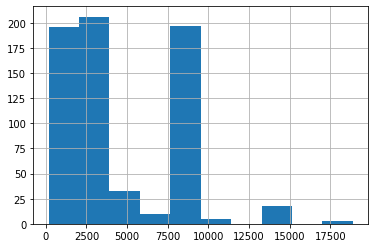

In [8]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

In [9]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater 
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of 
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks
    

shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])
    
    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<AxesSubplot:>

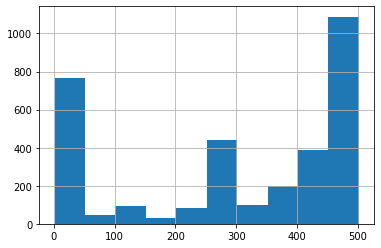

In [10]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

In [16]:
!pip install --upgrade pip
!pip3 install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached openai-0.27.1.tar.gz (57 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 11.0 MB/s eta 0:00:00
  Created wheel for openai: filename=openai-0.27.1-py3-none-any.whl size=70091 sha256=1fee62f35216768f2f92d9fb5cfa85508d53f6441d42dae3940b515474437580
  Stored in directory: /root/.cache/pip/wheels/1f/d1/75/8015df8f7ec8ba5422d8a45786cbb64d421872f488c09303fe


In [18]:
import openai

openai.api_key = "BALAS_API_KEY"

df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])
df.to_csv('processed/embeddings.csv')
df.head()

,text,n_tokens,embeddings
0,careers software tech lead hardware health.,8,"[0.029674092307686806, -0.01721385307610035, 0..."
1,The team is responsible for maximizing the ava...,501,"[0.01920984871685505, -0.020578108727931976, 0..."
2,Total compensation also includes generous equi...,113,"[0.004355669487267733, -0.005777535028755665, ..."
3,careers security engineer offensive#content.,8,"[0.0013247987953945994, -0.028907250612974167,..."
4,We are technical in what we build but are oper...,446,"[-0.00028804998146370053, -0.0307889636605978,..."


In [19]:
from openai.embeddings_utils import distances_from_embeddings

df['embeddings'] = df.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])

df.to_csv('processed/embeddings.csv')
df.head()

,text,n_tokens,embeddings
0,careers software tech lead hardware health.,8,"[0.029674092307686806, -0.01721385307610035, 0..."
1,The team is responsible for maximizing the ava...,501,"[0.01920984871685505, -0.020578108727931976, 0..."
2,Total compensation also includes generous equi...,113,"[0.004355669487267733, -0.005777535028755665, ..."
3,careers security engineer offensive#content.,8,"[0.0013247987953945994, -0.028907250612974167,..."
4,We are technical in what we build but are oper...,446,"[-0.00028804998146370053, -0.0307889636605978,..."


In [20]:
import pandas as pd
import numpy as np
from openai.embeddings_utils import distances_from_embeddings, cosine_similarity

df=pd.read_csv('processed/embeddings.csv', index_col=0)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array)

df.head()

,text,n_tokens,embeddings
0,careers software tech lead hardware health.,8,"[0.029674092307686806, -0.01721385307610035, 0..."
1,The team is responsible for maximizing the ava...,501,"[0.01920984871685505, -0.020578108727931976, 0..."
2,Total compensation also includes generous equi...,113,"[0.004355669487267733, -0.005777535028755665, ..."
3,careers security engineer offensive#content.,8,"[0.0013247987953945994, -0.028907250612974167,..."
4,We are technical in what we build but are oper...,446,"[-0.00028804998146370053, -0.0307889636605978,..."


In [21]:
def create_context(
    question, df, max_len=1800, size="ada"
):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """

    # Get the embeddings for the question
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Get the distances from the embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embeddings'].values, distance_metric='cosine')


    returns = []
    cur_len = 0

    # Sort by distance and add the text to the context until the context is too long
    for i, row in df.sort_values('distances', ascending=True).iterrows():
        
        # Add the length of the text to the current length
        cur_len += row['n_tokens'] + 4
        
        # If the context is too long, break
        if cur_len > max_len:
            break
        
        # Else add it to the text that is being returned
        returns.append(row["text"])

    # Return the context
    return "\n\n###\n\n".join(returns)

def answer_question(
    df,
    model="text-davinci-003",
    question="Am I allowed to publish model outputs to Twitter, without a human review?",
    max_len=1800,
    size="ada",
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        df,
        max_len=max_len,
        size=size,
    )
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=f"Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\nContext: {context}\n\n---\n\nQuestion: {question}\nAnswer:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

In [22]:
answer_question(df, question="What day is it?", debug=False)

"I don't know."

In [23]:
answer_question(df, question="What is our newest embeddings model?")

'The new model is text-embedding-ada-002.'

In [24]:
answer_question(df, question="What is Triton?")

"I don't know."

In [25]:
answer_question(df, question="Tell me about open positions at OpenAI?")

'At OpenAI, we are pushing the boundaries of the capabilities of artificial intelligence. Our success depends on the ability to quickly iterate on products while also ensuring that they are performant and reliable. We need problem-solving engineers with deep technical knowledge in software development processes, reliability, and performance. The annual salary range for this role is $370,000 – $600,000. Total compensation also includes generous equity and benefits. Medical, dental, and vision insurance for you and your family, mental health and wellness support, 401(k) plan with 4% matching, unlimited time off and 18+ company holidays per year, paid parental leave (20 weeks) and family-planning support, and an annual learning & development stipend ($'

In [26]:
answer_question(df, question="How do you align powerful AI systems?")

'We aim for a more pragmatic approach: building and aligning a system that can make faster and better alignment research progress than humans can. We believe that evaluating alignment research is substantially easier than producing it, especially when provided with evaluation assistance. We only need “narrower” AI systems that have human-level capabilities in the relevant domains to do as well as humans on alignment research. Language models are particularly well-suited for automating alignment research because they come “preloaded” with a lot of knowledge and information about human values from reading the internet.'